In [1]:
include("../encoding.jl")
include("../plotting.jl")

legend_py (generic function with 1 method)

# One dimension

In [2]:
D = 20_000
f(x) = x*sin(10x)
x = range(0,1, length=200)

0.0:0.005025125628140704:1.0

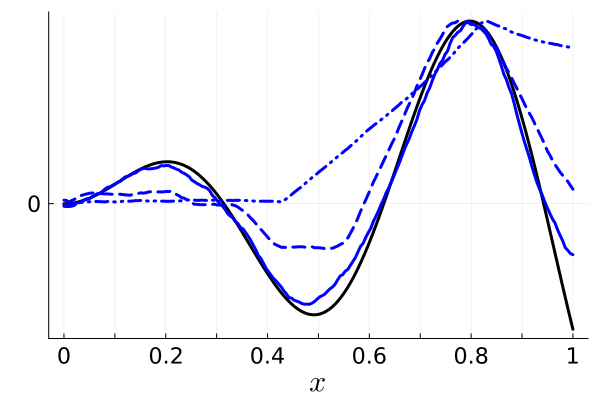

In [3]:
bipolar=true


xvalues = range(0,1,length=11);
xmarks = [0, "", 0.2, "", 0.4, "", 0.6, "", 0.8, "", 1]
yvalues = [0];

lengthscales = [0.4, 0.2, 0.1]
linestyles = [:dashdotdot, :dash, :solid]

pl = plot(x, f.(x), c=:black, legend=false, linewidth=3, xticks=(xvalues, xmarks), yticks=yvalues, xlabel=L"x")
for i in 1:3
    encoder = realvalue_encoder(lengthscales[i],D, bipolar=bipolar);
    Δx = encode(encoder, x);
    F = Δx' * f.(x) / length(x);
    F = sign.(F)
    plot!(x, Δx * F / D / maximum(Δx * F / D) * maximum(f.(x)), linewidth=3, c=:blue, linestyle=linestyles[i])
end
plot!(guidefontsize=20, tickfontsize=15,left_margin = 5Plots.mm)

save(pl, "1D_bipolar"*string(bipolar))

pl

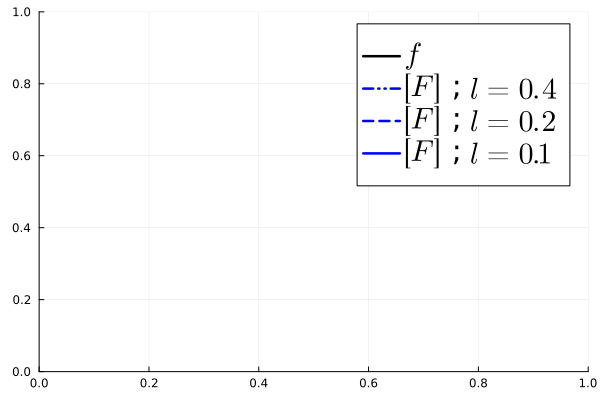

In [4]:
guide = plot([2],[2],xlim=(0,1), ylim=(0,1), legendfontsize=20, c=:black, label=L"f")
for i in 1:3
    plot!([2,2], [2,2],linewidth=3, c=:blue, linestyle=linestyles[i], label=L"$[F]$ ; $l="*string(lengthscales[i]))
end
    
save(guide, "1D_bipolar"*string(bipolar)*"_guide")
guide

# ALL

## 1D

In [16]:
l,D = 0.1, 20_000
encoder = realvalue_encoder(l,D, bipolar=bipolar);
Δx = encode(encoder, x);
F1D = Δx' * f.(x) / length(x);

## 2D

In [17]:
using Base.Iterators
using LinearAlgebra

In [18]:
D, l = 20_000, 0.1
x = range(0,1, length=100)
xy_grid = collect(product(x,x));
xy = collect(reduce(hcat, collect.(vec(xy_grid)))');

function f(args::Vector)
    m1 = [0.35,0.35]
    m2 = [0.65,0.65]
    s = 0.15
    return exp(-LinearAlgebra.norm(((args .-m1) /s))^2) + exp(-LinearAlgebra.norm(((args .-m2) /s))^2)
end
fxy = reshape(f.(xy[i,:] for i in 1:size(xy, 1)), size(xy_grid));
encoder = realvalue_encoder(l,D, bipolar=bipolar);
Δxy = encode(encoder, xy[:,1]) .* circshift(encode(encoder, xy[:,2]), (0,1))
F2D = Δxy' * fxy[:] / size(xy,1);

## Proteins

In [19]:
using DelimitedFiles

In [20]:
ϕx = readdlm("../proteins_X") .+ 0.04  #a small value is added to account for negative values when computing normalizatin function
y = readdlm("../proteins_y")[:]
umapx = readdlm("../proteins_UMAP");
bounds = 0.1
umapx = (1-2*bounds)*umapx .+bounds # some space at the boundaries for a nicer plot

D = size(ϕx,2)
K = ϕx*ϕx' / D
n = find_normalization(K, n_iter=10)
Δxp = ϕx ./ n;

Fproteins = Δxp'*y / length(y);

## Plot

In [21]:
function scale(x)
    return (x .- minimum(x)) / (maximum(x)-minimum(x))
end

scale (generic function with 1 method)

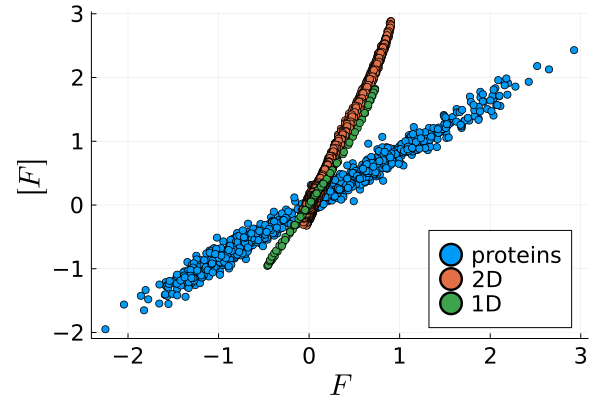

In [39]:
pl = scatter(Δxp * Fproteins / D, Δxp * sign.(Fproteins) / D, alpha=1,label="proteins")
scatter!(Δxy * F2D / D, Δxy* sign.(F2D) / D, alpha=1, label="2D")
scatter!(Δx * F1D / D, Δx * sign.(F1D) / D, alpha=1, label="1D")
plot!(guidefontsize=20, tickfontsize=15,legendfontsize=15; left_margin = 5Plots.mm, xlabel=L"$F$",ylabel=L"$[F]$", legend=:bottomright)

save(pl, "all")
pl